### Caracterización general de la red

1. Cantidad promedio de referencias por paper
2. Cantidad de papers con "n" referencias
3. Número medio de veces que un paper es citado
4. Distribución de referencias por paper
5. Distribución de grado de los papers
6. Número de papers en función del tiempo
7. Distribución de frecuencias de los campos temáticos

#### Apertura de un archivo concreto

Acá abrimos el archivo para hacer la caracterización de los papers.

In [2]:
import numpy as np
import ast
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.cm as cmx
# For color mapping
import matplotlib.colors as colors

path="D:\\Para procesar\\Académica\\Ciencias Físicas\\Doctorado\\Materias\\Redes complejas\\Trabajos_prácticos\\Practica_computacional\\"
version=1

In [9]:
paper_conjuntos = []

#Saca el campo del diccionario
def sacarcampo(paper,key):
    if key in paper:
        del paper[key]

#Filtra papers, saca campos innecesarios y guarda en archivo "papers_filtro_n.txt"
def abrir_papers(R_n,paper_conjuntos):
    paper_conjuntos = []
    
    R = open(path+'\mag_papers_'+R_n+'.txt', 'r') 
    N = 1000000
    i = 0
    for line in R:
        paper=ast.literal_eval(line)
        try:
            paper['doc_type']
            #paper['fos']
            #paper['keywords']
            paper['references']
            #paper['venue']
            if paper['doc_type']=='Journal' and paper['lang']=='en':
                paper_conjuntos.append(paper)
        except KeyError:
            pass
        i+=1
        if i==N:
            break
    R.close()

    return(paper_conjuntos)

#Crea lista de papers filtrados y diccionario de papers citados y su frecuencia
def contador(ides_in,ides_out,paper_conjuntos):
    for line in range(len(paper_conjuntos)):
        ides_out.append(paper_conjuntos[line]['id'])
        a=paper_conjuntos[line]['references']
        for tag in range(len(a)):
            try:
                b=ides_in[a[tag]]
                b+=1
                ides_in.update({a[tag]:b})
            except:
                ides_in[a[tag]]=1
    return(ides_in)

#Crea el archivo de papers filtrados, la lista y el diccionario de frecuencias de citas
def agregar_contar(ides_in,ides_out,R_n,paper_conjuntos):
    paper_conjuntos=abrir_papers(R_n,paper_conjuntos)
    ides_in=contador(ides_in,ides_out,paper_conjuntos)
    return(ides_in,ides_out)
    
ides_out=[]
ides_in={}
for i in range(166,167):
    paper_conjuntos=abrir_papers(str(i),paper_conjuntos)
    print(i)

166


#### Número medio de referencias por paper

In [18]:
def numero_medio_referencias(lista_papers):
    numero_referencias = []
    
    for i in range(len(lista_papers)):
        numero_referencias.append(len(lista_papers[i]['references']))
    
    return np.mean(np.array(numero_referencias))

In [21]:
referencias = numero_medio_referencias(paper_conjuntos)
print('# medio de referencias - '+str(referencias))

# medio de referencias - 25.037186031574322


#### Número de papers con n referencias

In [23]:
def frequency(Lista):
    grupo={}
    for line in range(len(Lista)):
        try:
            b=grupo[Lista[line]]
            b+=1
            grupo.update({Lista[line]:b})
        except:
            grupo[Lista[line]]=1
    return(grupo)

In [24]:
def numero_papers_n_referencias(lista_papers):
    numero_referencias = []
    
    for i in range(len(lista_papers)):
        numero_referencias.append(len(lista_papers[i]['references']))
    
    numero_referencias.sort()
    grupo = frequency(numero_referencias)
    numero_refe = list(grupo.keys())
    numero_papers = list(grupo.values())
    return numero_refe, numero_papers

<function matplotlib.pyplot.show(*args, **kw)>

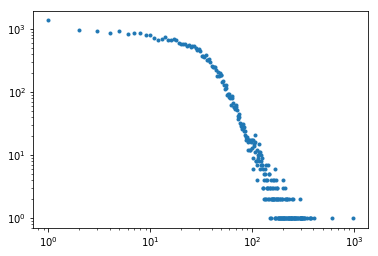

In [29]:
ref,freq=numero_papers_n_referencias(paper_conjuntos)
plt.loglog(ref,freq,'.')
plt.show

NameError: name 'G' is not defined

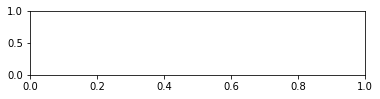

In [30]:
# Distribución de grado
plt.subplot(311)
grados_G = [gra for n,gra in G.degree()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k')
#plt.yscale('log')
plt.show()
plt.subplot(312)
# Distribución de grado IN
grados_G = [gra for n,gra in G.in_degree()] 
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k_IN')
#plt.yscale('log')
plt.show()
plt.subplot(313)
# Distribución de grado OUT
grados_G = [gra for n,gra in G.out_degree()]
Datos = np.asarray(grados_G)
b=np.logspace(0,3,50)
plt.hist(Datos, bins=b, log=True) 
plt.xscale('log')
plt.xlabel('k_OUT')
#plt.yscale('log')
plt.show()

In [31]:
len(paper_conjuntos)

29581

In [ ]:
def referencias_por_anio(lista_papers):
    for i in range(len(lista_papers)):
        for year in lista_papers[i]['year']: